In [5]:
initial = 20000
monthly_savings = 500 
savings_growth = 3
returns = 8
tax_rate = 26
years = 12

net_returns = returns * (1 - tax_rate / 100)

In [29]:
# dataframe by month
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        "Year": list(range(1, years + 1)),
        "Previous": [initial] + [np.nan]*(years-1),
        "Returns": [np.nan]*years,
        "Invested": [np.nan]*years,
        "End": [np.nan]*years
    }
)

df = df.set_index("Year")
df

,Previous,Returns,Invested,End
Year,,,,
1,20000.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [30]:
for i in range(1, years + 1):
    if i > 1:
        df.loc[i, "Previous"] = end
    df.loc[i, "Returns"] = df.loc[i, "Previous"] * net_returns / 100
    df.loc[i, "Invested"] = (monthly_savings * 12) * (1 + savings_growth / 100)**i
    end = df.loc[i].sum()
    df.loc[i, "End"] = end

df

,Previous,Returns,Invested,End
Year,,,,
1,20000.000000,1184.000000,6180.000000,27364.000000
2,27364.000000,1619.948800,6365.400000,35349.348800
3,35349.348800,2092.681449,6556.362000,43998.392249
4,43998.392249,2604.704821,6753.052860,53356.149930
5,53356.149930,3158.684076,6955.644446,63470.478452
6,63470.478452,3757.452324,7164.313779,74392.244555
7,74392.244555,4404.020878,7379.243193,86175.508626
8,86175.508626,5101.590111,7600.620488,98877.719224
9,98877.719224,5853.560978,7828.639103,112559.919306


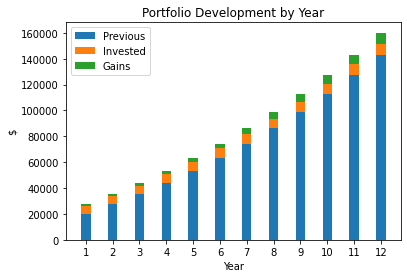

In [44]:
import matplotlib.pyplot as plt

width = 0.35
fig, ax = plt.subplots()

ax.bar(df.index, df.Previous, width, label='Previous')
ax.bar(df.index, df.Invested, width, bottom=df.Previous, label='Invested')
ax.bar(df.index, df.Returns, width, bottom=df.Previous + df.Invested, label='Gains')

ax.set_ylabel('$')
ax.set_xlabel('Year')
ax.set_title('Portfolio Development by Year')
ax.legend()
ax.set_xticks(df.index)
plt.show()

In [38]:
# now with Plotly